

*   Erick Axel Martinez Rios A01331212
*   Applied Computing
*   December 1st 2020





Pulp Installation 

In [1]:
!pip install pulp



---



---



---



**Question 1**

---



A supplier must prepare at least 500 gallons of an innovative beverage using 5 fruit drinks at the lowest possible cost. The new drink should contain at least 20% orange juice, 10% grapefruit juice, and 5% cranberry juice.
The characteristics of the base drinks, their availability and cost are given in the following table.

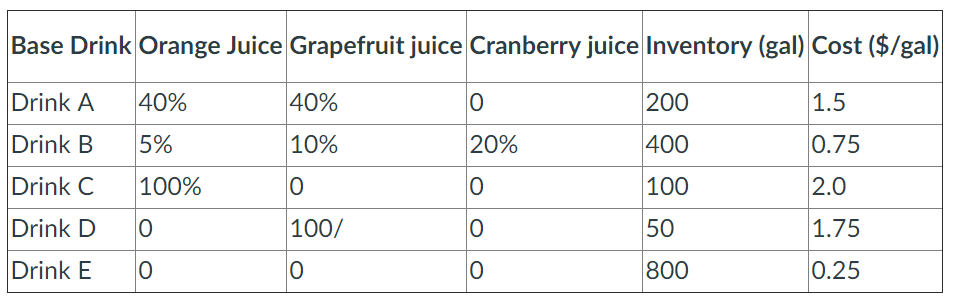

Deliver a jupyter notebook file with the following answers:

Formulate the mathematical model (10 pts)
Use python (scypy.optimize/pulp libraries ONLY) to solve the model. Print objective function, variables, shadow price and reduced cost results. (10 pts)
Give an interpretation of reduced cost and shadow price. (10 pts)

Formulate the mathematical model

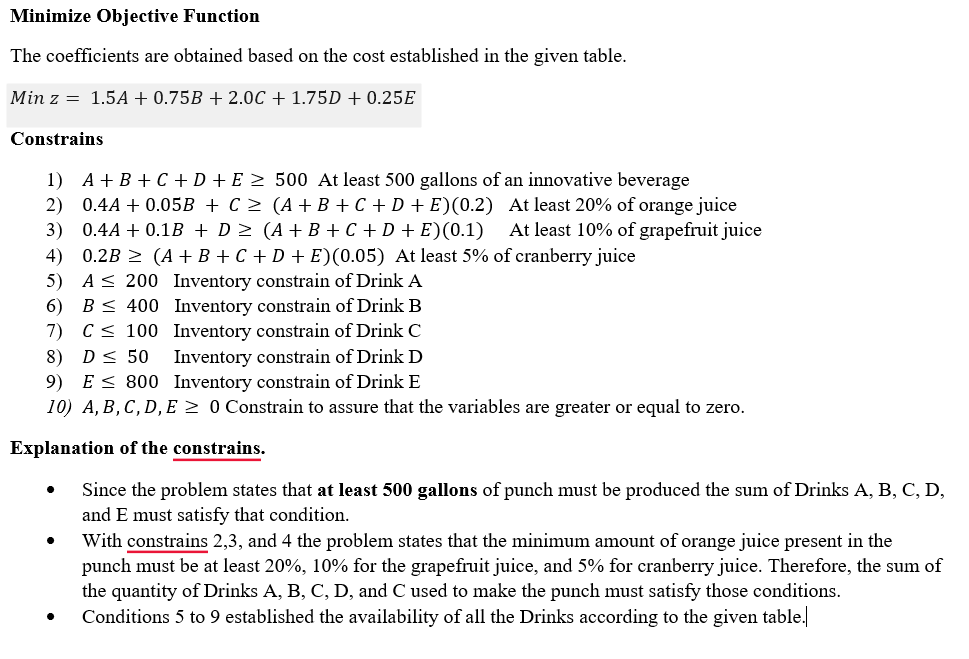

Import packages

In [2]:
import pandas as pd
from pulp import *

Define Minimization problem 

In [3]:
model_1 = LpProblem("Minimize", LpMinimize)

Define the variables 

In [4]:
A = LpVariable('A',0, None)
B = LpVariable('B',0, None)
C = LpVariable('C',0, None)
D = LpVariable('D',0, None)
E = LpVariable('E',0, None)

Define the mathematical model 

In [5]:
#Define Objective Function
model_1 += 1.5*A + 0.75*B + 2*C+1.75*D+ 0.25*E
#Define constrains 
model_1 += A + B + C + D + E >= 500  # Constrain for at least 500 gallons 
model_1 += 0.4*A + 0.05*B + C >= (A+B+C+D+E)*0.2 # Constrain for at least 20% of orange juice
model_1 += 0.4*A + (0.1)*B + D >= (A+B+C+D+E)*0.1 # Constrain for at least 10% of grapefruit juice
model_1 += (0.2)*B >= (A+B+C+D+E)*0.05 # Constrain for at least 5% of cranberry juice
model_1 += A <= 200 # Constrain for Drink 1
model_1 += B <= 400 # Constrain for Drink 2 
model_1 += C <= 100 # Constrain for Drink 3
model_1 += D <= 50 # Constrain for Drink 4
model_1 += E <= 800 # Constrain for Drink 5

Solve model 

In [6]:
model_1.solve()
LpStatus[model_1.status]

'Optimal'

Print Model 

In [7]:
print(model_1)

Minimize:
MINIMIZE
1.5*A + 0.75*B + 2*C + 1.75*D + 0.25*E + 0.0
SUBJECT TO
_C1: A + B + C + D + E >= 500

_C2: 0.2 A - 0.15 B + 0.8 C - 0.2 D - 0.2 E >= 0

_C3: 0.3 A + 0 B - 0.1 C + 0.9 D - 0.1 E >= 0

_C4: - 0.05 A + 0.15 B - 0.05 C - 0.05 D - 0.05 E >= 0

_C5: A <= 200

_C6: B <= 400

_C7: C <= 100

_C8: D <= 50

_C9: E <= 800

VARIABLES
A Continuous
B Continuous
C Continuous
D Continuous
E Continuous



Variables optimal values and optimal solution 

In [8]:
print("Use {} gal of Drink A".format(A.varValue))
print("Use {} gal of Drink B".format(B.varValue))
print("Use {} gal of Drink C".format(C.varValue))
print("Use {} gal of Drink D".format(D.varValue))
print("Use {} gal of Drink E".format(E.varValue))
print("Min cost:", value(model_1.objective), "$")

Use 93.75 gal of Drink A
Use 125.0 gal of Drink B
Use 56.25 gal of Drink C
Use 0.0 gal of Drink D
Use 225.0 gal of Drink E
Min cost: 403.125 $


The optimal values for each of the drinks and the minimum cost is displayed.  It is possible to observe that for Drink D the amount to be used is equal to zero. This value is expected since the cost of that particular Drink is higher compared to other Drinks so its use could increase the optimal cost and the solver tries to minimize the cost of the given problem. 

Reduced cost and shadow price 

In [9]:
for v in model_1.variables():
    print (v.name, "=", v.varValue, "\tReduced Cost =", v.dj)
o = [{'name':name, 'ShadowPrice':c.pi, 'tSlack':c.slack} for name, c in model_1.constraints.items()]
print(pd.DataFrame(o))

A = 93.75 	Reduced Cost = -4.1633363e-17
B = 125.0 	Reduced Cost = 1.6653345e-16
C = 56.25 	Reduced Cost = -4.1633363e-17
D = 0.0 	Reduced Cost = 0.125
E = 225.0 	Reduced Cost = 1.2490009e-16
  name  ShadowPrice        tSlack
0  _C1      0.80625 -0.000000e+00
1  _C2      1.75000 -1.421086e-14
2  _C3      1.37500 -0.000000e+00
3  _C4      1.37500 -3.552714e-15
4  _C5      0.00000  1.062500e+02
5  _C6      0.00000  2.750000e+02
6  _C7      0.00000  4.375000e+01
7  _C8      0.00000  5.000000e+01
8  _C9      0.00000  5.750000e+02


The shadow price and reduced cost of the model can be appreciated 

In this case, since the objective function it's been minimized, the reduced costs displayed showed the amount by which the coefficients of the variables of the objective function should decrease to assume a positive value in the optimal solution or, in other words, the corresponding variable of that reduced cost would be cost-effective. For Drinks A, B, C, and E the reduced cost is very small in the order of {10}^{-16} and {10}^{-17}, so they can be neglected. Nevertheless, the Reduced cost of Drink D is 0.125, this value implies that it is necessary to reduce the value of the coefficient of the D variable to an amount of 0.125 to be cost-effective. 

In the case of constraints 5 to 9, the shadow prices are equal to zero. This implies that an increment of one unit on the right side of the constraint will not produce a change in the optimal value. On the other hand,  the constraints 1 to 4 have a nonzero shadow price. With constrain 1, the increment of 1 unit on its right side will produce an increment in the optimal value of 0.80625. This increment is expected since the supplier will require more gallons of each drink to produce the required minimum amount. A similar case occurs for the constrains 2 to 4 that are related to the percentage of each juice required in the punch where an increment in the optimal value will occur if the required number of gallons of each drink increases. 

**Validation of shadow prices and reduced costs**

**In this section, the Reduced cost and the shadow prices associated with each constrain can be tested according to the values obtained in the previous cell.**

It is neccesary to make the change in the model and constrains to test the behaviour. 

In [10]:
model_2 = LpProblem("Minimize", LpMinimize)

In [11]:
#Define Objective Function
model_2 += 1.5*A + 0.75*B + 2*C+(1.75-0.125)*D+ 0.25*E
#Define constrains 
model_2 += A + B + C + D + E >= 500 # Constrain for at least 500 gallons increase by one unit 
model_2 += 0.4*A + 0.05*B + C >= (A+B+C+D+E)*0.2 # Constrain for at least 20% of orange juice
model_2 += 0.4*A + (0.1)*B + D >= (A+B+C+D+E)*0.1 # Constrain for at least 10% of grapefruit juice
model_2 += (0.2)*B >= (A+B+C+D+E)*0.05 # Constrain for at least 5% of cranberry juice
model_2 += A <= 200 # Constrain for Drink 1
model_2 += B <= 400 # Constrain for Drink 2 
model_2 += C <= 100 # Constrain for Drink 3
model_2 += D <= 50 # Constrain for Drink 4
model_2 += E <= 800 # Constrain for Drink 5

In [12]:
model_2.solve()
LpStatus[model_2.status]

'Optimal'

In [13]:
print("Use {} gal of Drink A".format(A.varValue))
print("Use {} gal of Drink B".format(B.varValue))
print("Use {} gal of Drink C".format(C.varValue))
print("Use {} gal of Drink D".format(D.varValue))
print("Use {} gal of Drink E".format(E.varValue))
print("Min cost:", value(model_2.objective), "$")

Use 0.0 gal of Drink A
Use 125.0 gal of Drink B
Use 93.75 gal of Drink C
Use 37.5 gal of Drink D
Use 243.75 gal of Drink E
Min cost: 403.125 $


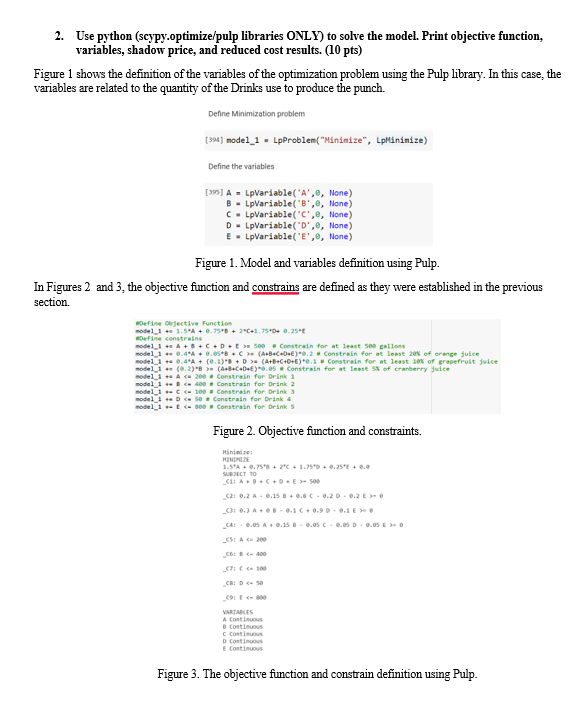

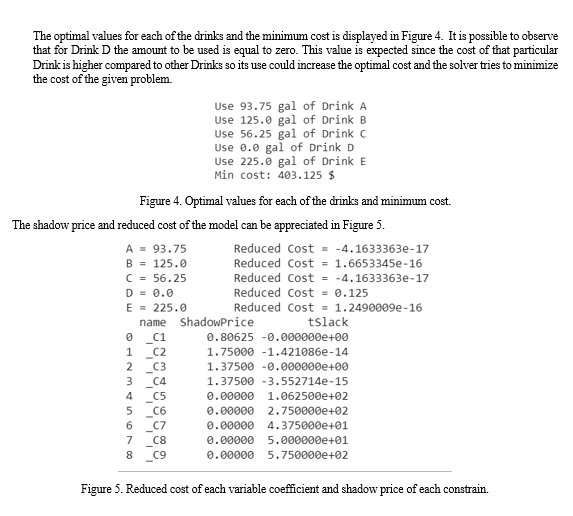

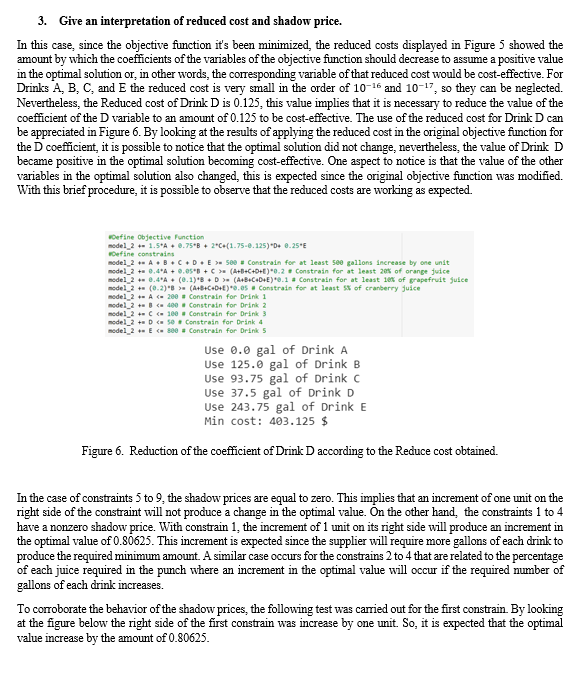

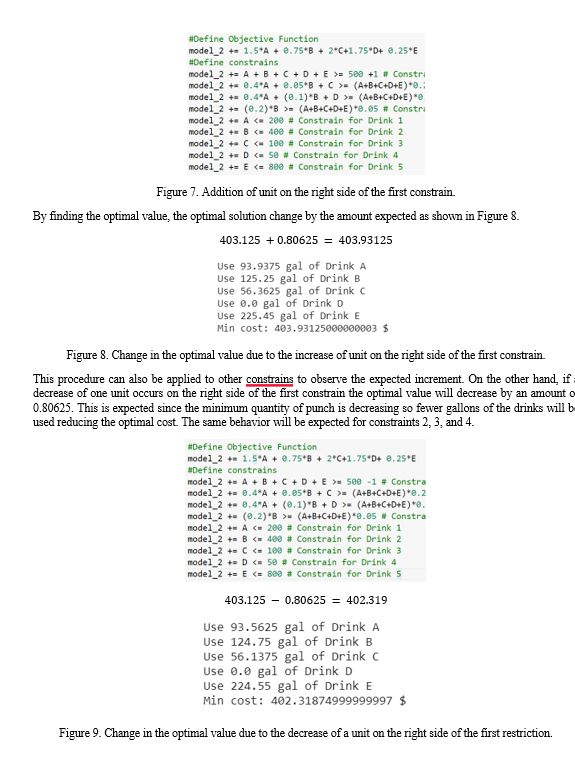



---



---



---





---



---



**Question 2**

Perform a principal component analysis for the following file. pcanutrition.csv
Define how many components are necessary to keep 60% of the variance of the data. (10 pts)
What are the three most significant variables for the dataset? (10 pts)

Upload file 

In [14]:
from google.colab import files
uploaded = files.upload()

Saving pcanutrition.csv to pcanutrition (2).csv


Import CSV file 

In [15]:
import io
import numpy as np #Library to manage arrays 
import pandas as pd #Lirary for mange dataframes 
import matplotlib.pyplot as plt # Library to make plots. 
#Import csv into a dataframe 
df_nutrition = pd.read_csv(io.BytesIO(uploaded['pcanutrition.csv'])) 
print("Complete Data shape:", df_nutrition.shape) 

Complete Data shape: (8618, 42)


The database has a total of 8618 samples and 42 columns. Nevertheless, some of the columns including the ID column were removed before performing the PCA analysis.  The other columns that were removed and the number of different values that they have are listed below.  
•	Food group: 25
•	ShortDescrip: 8614
•	Descrip: 8618


Count number of categories for each non numeric column 

In [16]:
print('FoodGroup:',df_nutrition['FoodGroup'].value_counts().shape[0])
print('ShortDescrip:',df_nutrition['ShortDescrip'].value_counts().shape[0])
print('Descrip:',df_nutrition['Descrip'].value_counts().shape[0])

FoodGroup: 25
ShortDescrip: 8614
Descrip: 8618


In [17]:
df_nutrition["FoodGroup"].astype('category').value_counts(normalize=False)

Beef Products                          946
Vegetables and Vegetable Products      828
Baked Products                         797
Soups, Sauces, and Gravies             452
Lamb, Veal, and Game Products          438
Poultry Products                       390
Legumes and Legume Products            389
Fast Foods                             371
Breakfast Cereals                      363
Baby Foods                             362
Sweets                                 347
Fruits and Fruit Juices                346
Pork Products                          343
Beverages                              315
Finfish and Shellfish Products         267
Dairy and Egg Products                 264
Sausages and Luncheon Meats            244
Fats and Oils                          219
Cereal Grains and Pasta                183
Snacks                                 171
American Indian/Alaska Native Foods    165
Nut and Seed Products                  133
Meals, Entrees, and Side Dishes        113
Restaurant 

Display database in a dataframe

In [18]:
df_nutrition.head(3)

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,2.32,3,0.042,0.034,0.005,24,0.000,0.02,2,0.000,24,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,2.32,3,0.042,0.034,0.005,24,0.016,0.16,2,0.004,23,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,2.80,0,0.003,0.005,0.001,4,0.001,0.00,0,0.000,3,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909


Remove non numerical columns 

In [19]:
df_nutrition_remove = df_nutrition.drop(labels=['ID','FoodGroup','ShortDescrip','Descrip'],axis=1)

Final database for the PCA analysis 

In [20]:
df_nutrition_remove.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,2.32,3,0.042,0.034,0.005,24,0.000,0.02,2,0.000,24,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,2.32,3,0.042,0.034,0.005,24,0.016,0.16,2,0.004,23,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,2.80,0,0.003,0.005,0.001,4,0.001,0.00,0,0.000,3,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,0.25,36,1.016,0.382,0.029,528,0.040,0.31,23,0.009,387,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,0.26,20,0.118,0.351,0.014,674,0.024,0.43,24,0.012,451,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Shape of the database

In [21]:
df_nutrition_remove.shape

(8618, 38)

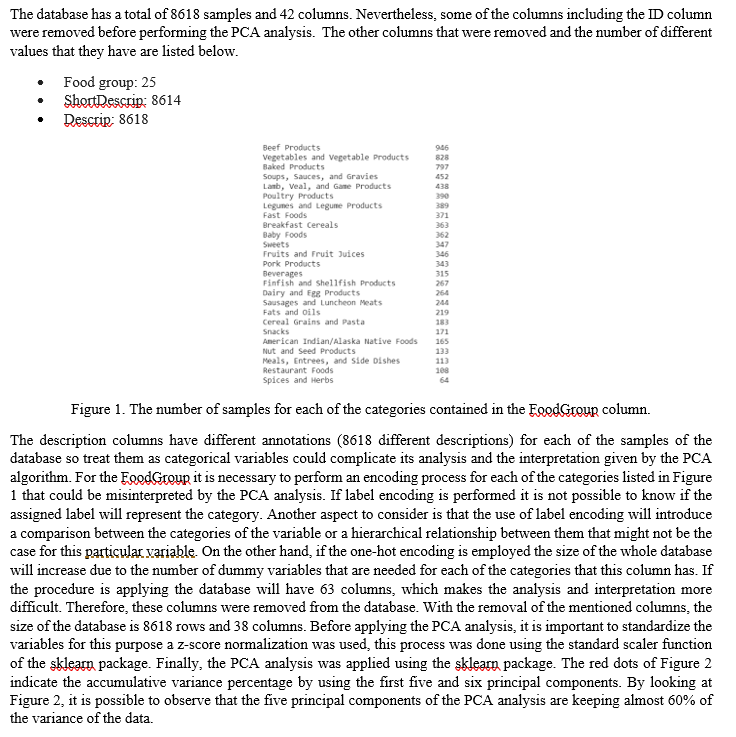

Compute PCA 

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Separating out the features
x = StandardScaler().fit_transform(df_nutrition_remove)

In [23]:
pca = PCA()
principalComponents = pca.fit_transform(x)

Accumulative Explained variance using the first 5 principal components 

In [24]:
print("Variance percentage of the first component:",pca.explained_variance_ratio_[0])
print("Variance percentage of the second component:",pca.explained_variance_ratio_[1])
print("Variance percentage of the third component:",pca.explained_variance_ratio_[2])
print("Variance percentage of the fourth component:",pca.explained_variance_ratio_[3])
print("Variance percentage of the fifth component:",pca.explained_variance_ratio_[4])
print("Accumulative variance percentage of first five principal components:",np.cumsum(pca.explained_variance_ratio_)[4])

Variance percentage of the first component: 0.25970166594146327
Variance percentage of the second component: 0.10828205053166708
Variance percentage of the third component: 0.09019010603018579
Variance percentage of the fourth component: 0.07716865501709974
Variance percentage of the fifth component: 0.06266698793844751
Accumulative variance percentage of first five principal components: 0.5980094654588634


Accumulative Explained variance using the first 6 principal components 

In [25]:
print("Variance percentage of the first component:",pca.explained_variance_ratio_[0])
print("Variance percentage of the second component:",pca.explained_variance_ratio_[1])
print("Variance percentage of the third component:",pca.explained_variance_ratio_[2])
print("Variance percentage of the fourth component:",pca.explained_variance_ratio_[3])
print("Variance percentage of the fifth component:",pca.explained_variance_ratio_[4])
print("Variance percentage of the sixth component:",pca.explained_variance_ratio_[5])
print("Accumulative variance percentage of first five principal components:",np.cumsum(pca.explained_variance_ratio_)[5])

Variance percentage of the first component: 0.25970166594146327
Variance percentage of the second component: 0.10828205053166708
Variance percentage of the third component: 0.09019010603018579
Variance percentage of the fourth component: 0.07716865501709974
Variance percentage of the fifth component: 0.06266698793844751
Variance percentage of the sixth component: 0.05508855438676981
Accumulative variance percentage of first five principal components: 0.6530980198456332


In [26]:
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,0.259702,0.367984,0.458174,0.535342,0.598009,0.653098,0.698955,0.74179,0.776691,0.811473,0.838714,0.862559,0.885609,0.906246,0.923399,0.938441,0.952246,0.963732,0.97474,0.984708,0.99313,0.9999,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Plot cumulative explained variance 

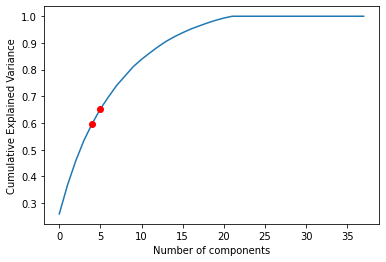

In [27]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot(4,np.cumsum(pca.explained_variance_ratio_)[4],'ro')
plt.plot(5,np.cumsum(pca.explained_variance_ratio_)[5],'ro')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

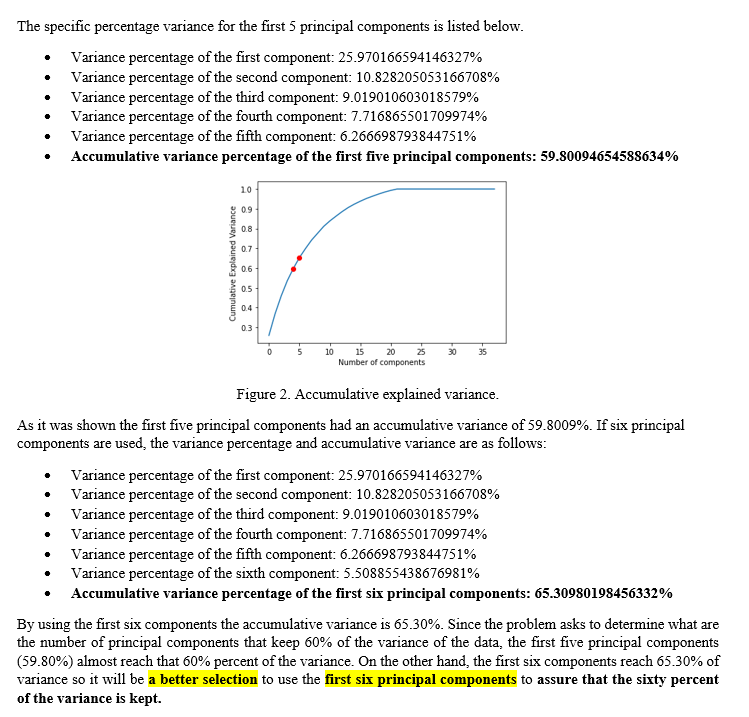

Compute loading scores 

In [28]:
df_npca = pd.DataFrame(pca.components_, columns=list(df_nutrition_remove.columns))
df_npca.head(3)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,0.093260,0.110906,0.013142,0.098943,0.038806,0.112393,0.109097,0.240479,0.147756,0.070302,0.099086,0.212663,0.258820,0.262413,0.204840,0.118434,0.140444,0.207546,0.166961,0.065269,0.147768,0.075559,0.187761,0.109097,0.240479,0.147756,0.070302,0.099086,0.212663,0.258820,0.262413,0.204840,0.118434,0.140444,0.166961,0.147768,0.075559,0.187761
1,-0.107177,0.121813,-0.017774,-0.207495,-0.136635,-0.141664,0.338184,-0.083039,0.359417,-0.051780,-0.077774,-0.131008,-0.058531,0.013584,-0.139936,-0.105687,0.306495,-0.100661,-0.089101,0.125265,0.001314,0.134056,0.048168,0.338184,-0.083039,0.359417,-0.051780,-0.077774,-0.131008,-0.058531,0.013584,-0.139936,-0.105687,0.306495,-0.089101,0.001314,0.134056,0.048168
2,0.145460,0.149082,0.136413,0.009074,-0.037849,0.138136,-0.063989,-0.123038,-0.066177,-0.086169,0.048507,-0.165277,-0.146048,-0.161894,-0.144481,0.299013,0.102700,0.014571,0.283290,0.035245,0.364688,0.120335,0.034207,-0.063989,-0.123038,-0.066177,-0.086169,0.048507,-0.165277,-0.146048,-0.161894,-0.144481,0.299013,0.102700,0.283290,0.364688,0.120335,0.034207


Most important features in the first principal component 

In [29]:
loading_scores = pd.Series(pca.components_[0], index=df_nutrition_remove.columns)
soarted_loading_scores =  loading_scores.abs().sort_values(ascending = False)
size = 15
ind = soarted_loading_scores[0:size].index.values
print(loading_scores[ind])

Riboflavin_mg       0.262413
Riboflavin_USRDA    0.262413
Niacin_mg           0.258820
Niacin_USRDA        0.258820
VitB6_mg            0.240479
VitB6_USRDA         0.240479
Folate_mcg          0.212663
Folate_USRDA        0.212663
Iron_mg             0.207546
Thiamin_mg          0.204840
Thiamin_USRDA       0.204840
Zinc_mg             0.187761
Zinc_USRDA          0.187761
Magnesium_USRDA     0.166961
Magnesium_mg        0.166961
dtype: float64


Plot variance explained by each component 

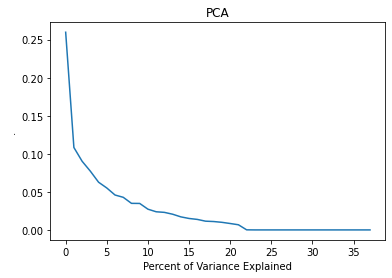

In [32]:
import matplotlib.pyplot as plt 
plt.plot(pca.explained_variance_ratio_)
plt.title('PCA')
plt.xlabel('Percent of Variance Explained')
plt.ylabel('.')
plt.show()

**Most important features plotting** 

No handles with labels found to put in legend.


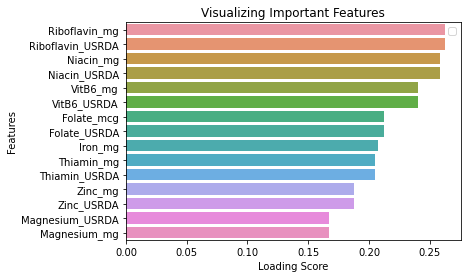

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=soarted_loading_scores[0:size], y= soarted_loading_scores[0:size].index)
# Add labels to your graph
plt.xlabel('Loading Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

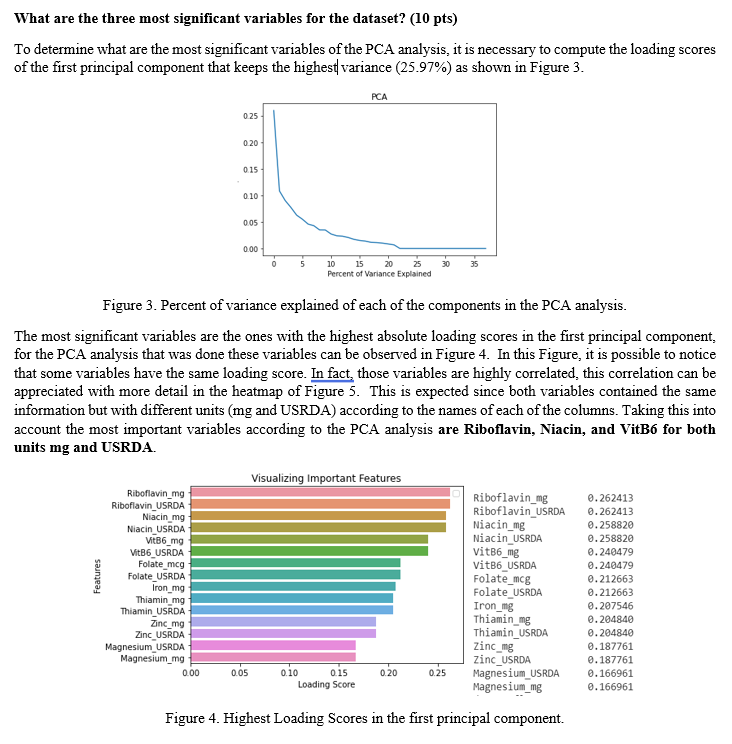

Pearson correlation 

Analyze if there is a correlation between the variables

Plot heatmap 

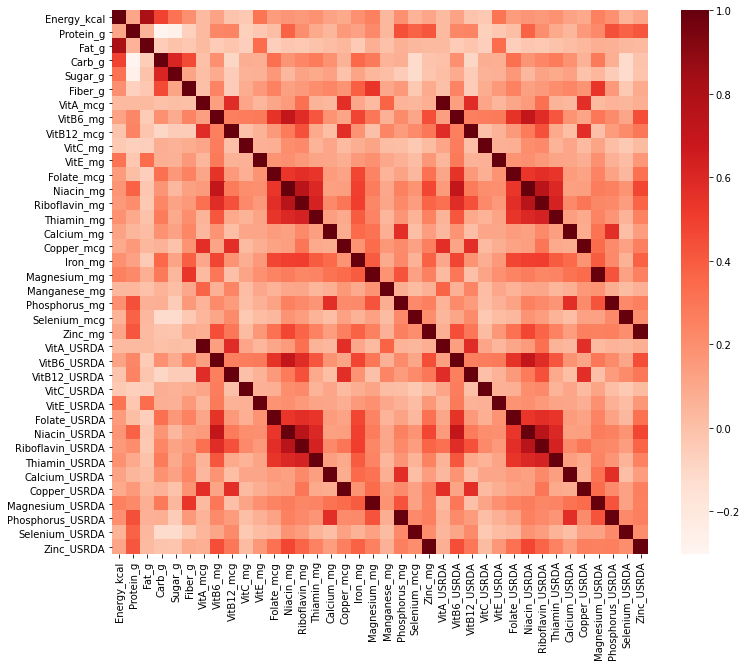

In [34]:
plt.figure(figsize=(12,10))
df_corr = df_nutrition_remove.corr()
sns.heatmap(df_corr, annot=False, cmap=plt.cm.Reds)
plt.show()

Remove highly correlated features 

In [35]:
threshold = 0.9
columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = df_nutrition_remove.columns[columns]
selected_columns
df_nutrition_no_corr = df_nutrition_remove[selected_columns]

In [36]:
df_nutrition_no_corr.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,2.32,3,0.042,0.034,0.005,24,0.000,0.02,2,0.000,24,1.0,0.09
1,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,2.32,3,0.042,0.034,0.005,24,0.016,0.16,2,0.004,23,1.0,0.05
2,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,2.80,0,0.003,0.005,0.001,4,0.001,0.00,0,0.000,3,0.0,0.01
3,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,0.25,36,1.016,0.382,0.029,528,0.040,0.31,23,0.009,387,14.5,2.66
4,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,0.26,20,0.118,0.351,0.014,674,0.024,0.43,24,0.012,451,14.5,2.60


In [37]:
df_nutrition_no_corr.shape

(8618, 23)

Compute PCA without the highly correlated variables 

In [38]:
x1 = StandardScaler().fit_transform(df_nutrition_no_corr)
pca_1 = PCA()
principalComponents = pca_1.fit_transform(x1)

Plot variance explained for each component 

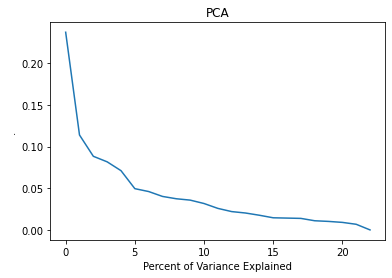

In [39]:
import matplotlib.pyplot as plt 
plt.plot(pca_1.explained_variance_ratio_)
plt.title('PCA')
plt.xlabel('Percent of Variance Explained')
plt.ylabel('.')
plt.show()

In [40]:
pca_1.explained_variance_ratio_

array([2.36925468e-01, 1.13846015e-01, 8.83433734e-02, 8.17013669e-02,
       7.11161480e-02, 4.95813332e-02, 4.61246638e-02, 4.02719041e-02,
       3.74790508e-02, 3.58559322e-02, 3.17927198e-02, 2.59519549e-02,
       2.21153503e-02, 2.04113766e-02, 1.77385355e-02, 1.46927827e-02,
       1.43290735e-02, 1.39668837e-02, 1.11392349e-02, 1.03538827e-02,
       9.18082227e-03, 6.91711649e-03, 1.65010749e-04])

In [41]:
print("Variance percentage of the first component:",pca_1.explained_variance_ratio_[0])
print("Variance percentage of the second component:",pca_1.explained_variance_ratio_[1])
print("Variance percentage of the third component:",pca_1.explained_variance_ratio_[2])
print("Variance percentage of the fourth component:",pca_1.explained_variance_ratio_[3])
print("Variance percentage of the fifth component:",pca_1.explained_variance_ratio_[4])
print("Variance percentage of the sixth component:",pca_1.explained_variance_ratio_[5])
print("Accumulative variance percentage of first five principal components:",np.cumsum(pca_1.explained_variance_ratio_)[4])
print("Accumulative variance percentage of first sixth principal components:",np.cumsum(pca_1.explained_variance_ratio_)[5])

Variance percentage of the first component: 0.23692546801354605
Variance percentage of the second component: 0.11384601533332067
Variance percentage of the third component: 0.08834337340257219
Variance percentage of the fourth component: 0.08170136690446628
Variance percentage of the fifth component: 0.07111614796968906
Variance percentage of the sixth component: 0.04958133319424717
Accumulative variance percentage of first five principal components: 0.5919323716235941
Accumulative variance percentage of first sixth principal components: 0.6415137048178413


In [42]:
df_nutrition_no_corr.shape

(8618, 23)

Loading scores 

No handles with labels found to put in legend.


Riboflavin_mg    0.341325
Niacin_mg        0.337779
VitB6_mg         0.315663
Iron_mg          0.299857
Folate_mcg       0.284102
Thiamin_mg       0.272453
Zinc_mg          0.243551
Magnesium_mg     0.241348
Phosphorus_mg    0.199403
Fiber_g          0.181570
Copper_mcg       0.180806
VitB12_mcg       0.177985
Carb_g           0.169685
Calcium_mg       0.168112
Energy_kcal      0.157814
dtype: float64


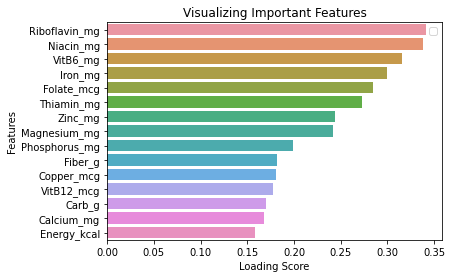

In [43]:
loading_scores = pd.Series(pca_1.components_[0], index=df_nutrition_no_corr.columns)
soarted_loading_scores =  loading_scores.abs().sort_values(ascending = False)
size = 15
ind = soarted_loading_scores[0:size].index.values
print(loading_scores[ind])
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=soarted_loading_scores[0:size], y= soarted_loading_scores[0:size].index)
# Add labels to your graph
plt.xlabel('Loading Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

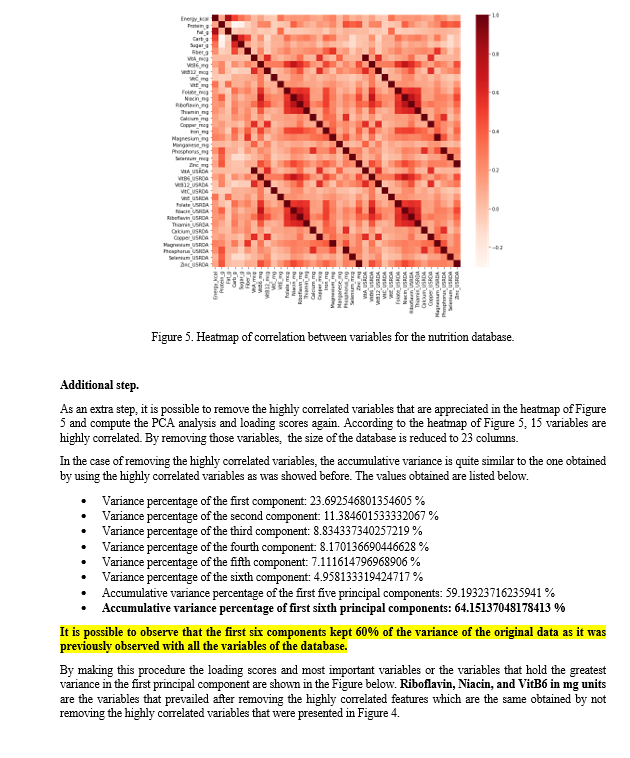



---



---



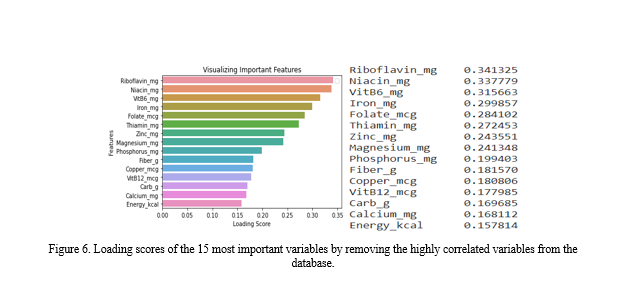



---



---



**Question 3**

Perform a classification analysis of the following dataset. The target column is res. sweden.csvPreview the document

1. Transform the data, split the dataset (80% training, 20% testing) (5 pts)

2. Perform a desicion-tree classification and a SVC(10 pts)

3. Obtained the confusion matrix for both methods. Give an interpretation of the results. (20 pts)

Upload CSV file for sweden data 

In [44]:
from google.colab import files
uploaded = files.upload()

Saving sweden.csv to sweden (2).csv


Import CSV 

In [45]:
#Import csv into a dataframe 
df_sweden = pd.read_csv(io.BytesIO(uploaded['sweden.csv'])) 
print("Complete Data shape:", df_sweden.shape) 

Complete Data shape: (1936, 19)


Database of SWEDEN

In [46]:
df_sweden.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Sweden,Allsvenskan,2012,31/03/2012,15:00,Elfsborg,Djurgarden,2,1,H,1.71,3.98,5.44,1.73,3.98,5.50,1.66,3.68,5.00
1,Sweden,Allsvenskan,2012,31/03/2012,15:00,GAIS,Hacken,0,0,D,2.21,3.57,3.48,2.50,3.57,3.50,2.25,3.24,3.11
2,Sweden,Allsvenskan,2012,31/03/2012,15:00,Sundsvall,Kalmar,0,1,A,2.72,2.39,2.80,2.75,3.31,2.82,2.64,3.14,2.62
3,Sweden,Allsvenskan,2012,01/04/2012,13:00,AIK,Mjallby,0,0,D,1.75,3.63,5.73,1.75,3.63,5.75,1.71,3.43,4.99
4,Sweden,Allsvenskan,2012,01/04/2012,16:30,Syrianska,Goteborg,2,1,H,5.01,3.49,1.87,5.01,3.65,1.89,4.63,3.41,1.77


Search for missing values 

In [47]:
columns_na = df_sweden.isnull().sum(axis = 0)
pd.set_option('display.max_rows', None)
columns_na

Country    0
League     0
Season     0
Date       0
Time       0
Home       0
Away       0
HG         0
AG         0
Res        0
PH         2
PD         2
PA         2
MaxH       0
MaxD       0
MaxA       0
AvgH       0
AvgD       0
AvgA       0
dtype: int64

In [48]:
print("Data shape withput NA values",df_sweden.dropna().shape)

Data shape withput NA values (1934, 19)


Remove NA values 

In [49]:
df_sweden = df_sweden.dropna(axis = 0, how ='any') 

The country column and league column have only one category

In [50]:
print(df_sweden['Country'].value_counts())
print(df_sweden['League'].value_counts())

Sweden     1927
Sweden        7
Name: Country, dtype: int64
Allsvenskan     1927
Allsvenskan        7
Name: League, dtype: int64


Number of seasons, dates, and times.

In [51]:
print("Number of Seasons:", df_sweden['Season'].value_counts().shape[0])
print("Number of dates:",df_sweden['Date'].value_counts().shape[0])
print("Number of Times:",df_sweden['Time'].value_counts().shape[0])

Number of Seasons: 8
Number of dates: 766
Number of Times: 28


Number of teams 

In [52]:
print('Home:',df_sweden['Home'].value_counts().shape[0])
print('Away:',df_sweden['Away'].value_counts().shape[0])

Home: 29
Away: 29


Number of matches played as Home team

In [53]:
print(df_sweden['Home'].value_counts())

Kalmar            121
AIK               120
Goteborg          120
Norrkoping        120
Elfsborg          120
Hacken            120
Djurgarden        120
Malmo FF          119
Orebro            105
Sundsvall          92
Helsingborg        91
Gefle              76
Hammarby           75
Halmstad           63
Falkenbergs        61
Atvidabergs        60
Ostersunds         60
Sirius             46
Mjallby            45
Brommapojkarna     45
Jonkopings         31
AFC Eskilstuna     31
Syrianska          30
Trelleborgs        16
Osters             15
GAIS               15
Dalkurd            15
Ljungskile          1
Brage               1
Name: Home, dtype: int64


Number of matches played as Away team

In [54]:
print(df_sweden['Away'].value_counts())

Kalmar            121
Djurgarden        120
Goteborg          120
Norrkoping        120
Elfsborg          120
Malmo FF          120
Hacken            120
AIK               119
Orebro            105
Sundsvall          92
Helsingborg        91
Gefle              76
Hammarby           75
Halmstad           63
Falkenbergs        61
Ostersunds         60
Atvidabergs        60
Sirius             46
Brommapojkarna     45
Mjallby            45
AFC Eskilstuna     31
Jonkopings         31
Syrianska          30
Trelleborgs        16
Dalkurd            15
GAIS               15
Osters             15
Brage               1
Ljungskile          1
Name: Away, dtype: int64


Remove Variables 

In [56]:
df_sweden_remove = df_sweden.drop(labels=['Country','League','Season','Date','Time','Home','Away','HG','AG'],axis=1)
df_sweden_remove.shape

(1934, 10)

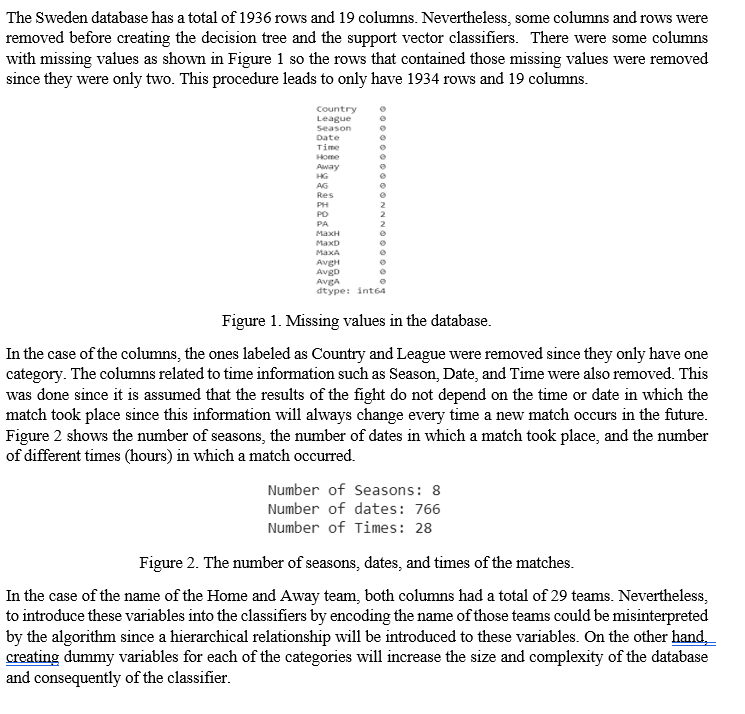

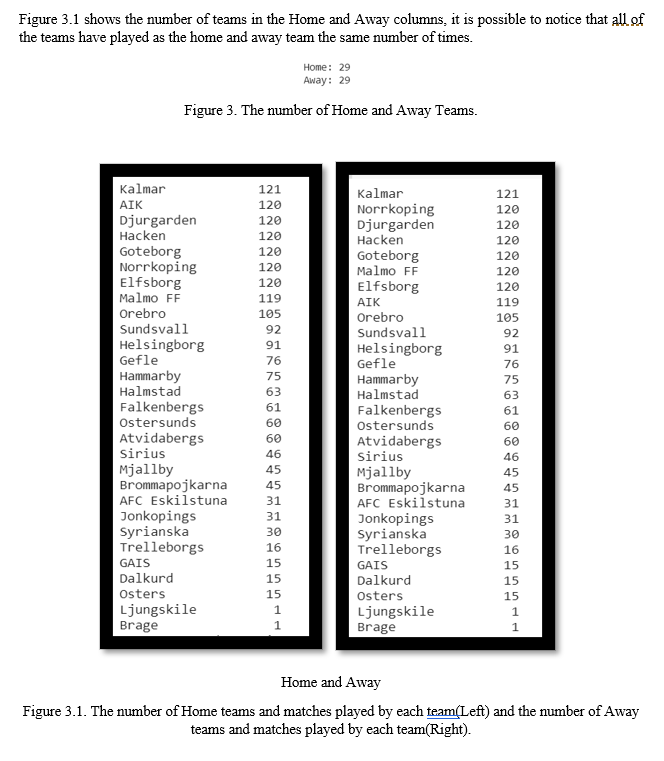

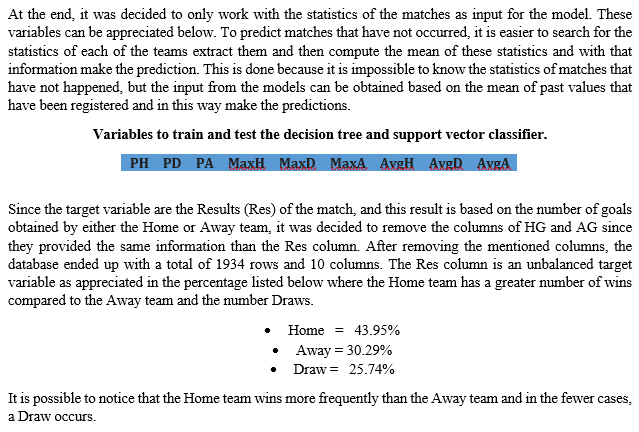



---



---





---



---



Final database

In [57]:
df_sweden_remove.head()

,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,H,1.71,3.98,5.44,1.73,3.98,5.50,1.66,3.68,5.00
1,D,2.21,3.57,3.48,2.50,3.57,3.50,2.25,3.24,3.11
2,A,2.72,2.39,2.80,2.75,3.31,2.82,2.64,3.14,2.62
3,D,1.75,3.63,5.73,1.75,3.63,5.75,1.71,3.43,4.99
4,H,5.01,3.49,1.87,5.01,3.65,1.89,4.63,3.41,1.77


Inputs extraction from the final database 

In [58]:
features = df_sweden_remove.loc[:,  df_sweden_remove.columns != 'Res']
print(features.shape)

(1934, 9)


Percentage of each class in the target variable

In [59]:
df_sweden_remove["Res"].astype('category').value_counts(normalize=True)

H    0.439504
A    0.302999
D    0.257497
Name: Res, dtype: float64

Decision Tree Training 

In [60]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import classification_report #Library for classification report 
from sklearn.metrics import confusion_matrix # Library to generate the confusion matrix of the model. 
# Features and target variable 
X = features.values
y = df_sweden_remove.loc[:,['Res']].values
print("Shape of input and output variables data", "X:" ,X.shape, "y:" ,y.shape)
# Split data in train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1) # 80% training and 20% test
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(max_depth=4)
# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)
#Predict the response for test dataset
print(X_train.shape, X_test.shape)
print("Accuracy with traning data set for Decision Tree: {:.4f}".format(dt.score(X_train, y_train)))
print("Accuracy with test data set for Desicion Tree: {:.4f}".format(dt.score(X_test, y_test)))
pred = dt.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred)) # Print confusion matrix 
print(classification_report(y_test, pred)) # Print classification report 

Shape of input and output variables data X: (1934, 9) y: (1934, 1)
(1547, 9) (387, 9)
Accuracy with traning data set for Decision Tree: 0.5553
Accuracy with test data set for Desicion Tree: 0.5297
Confusion Matrix
[[ 65   3  46]
 [ 43   4  49]
 [ 39   2 136]]
              precision    recall  f1-score   support

           A       0.44      0.57      0.50       114
           D       0.44      0.04      0.08        96
           H       0.59      0.77      0.67       177

    accuracy                           0.53       387
   macro avg       0.49      0.46      0.41       387
weighted avg       0.51      0.53      0.47       387



Plot Confusion Matrix 

('Confusion matrix, without normalization', None)
[[ 65   3  46]
 [ 43   4  49]
 [ 39   2 136]]


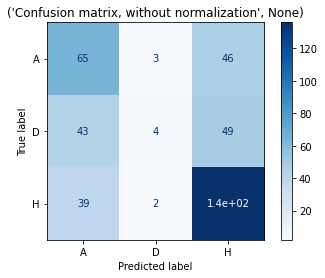

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None)]
for title in titles_options:
    disp = plot_confusion_matrix(dt, X_test, y_test,
                                 display_labels=dt.classes_,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Plot decision tree 

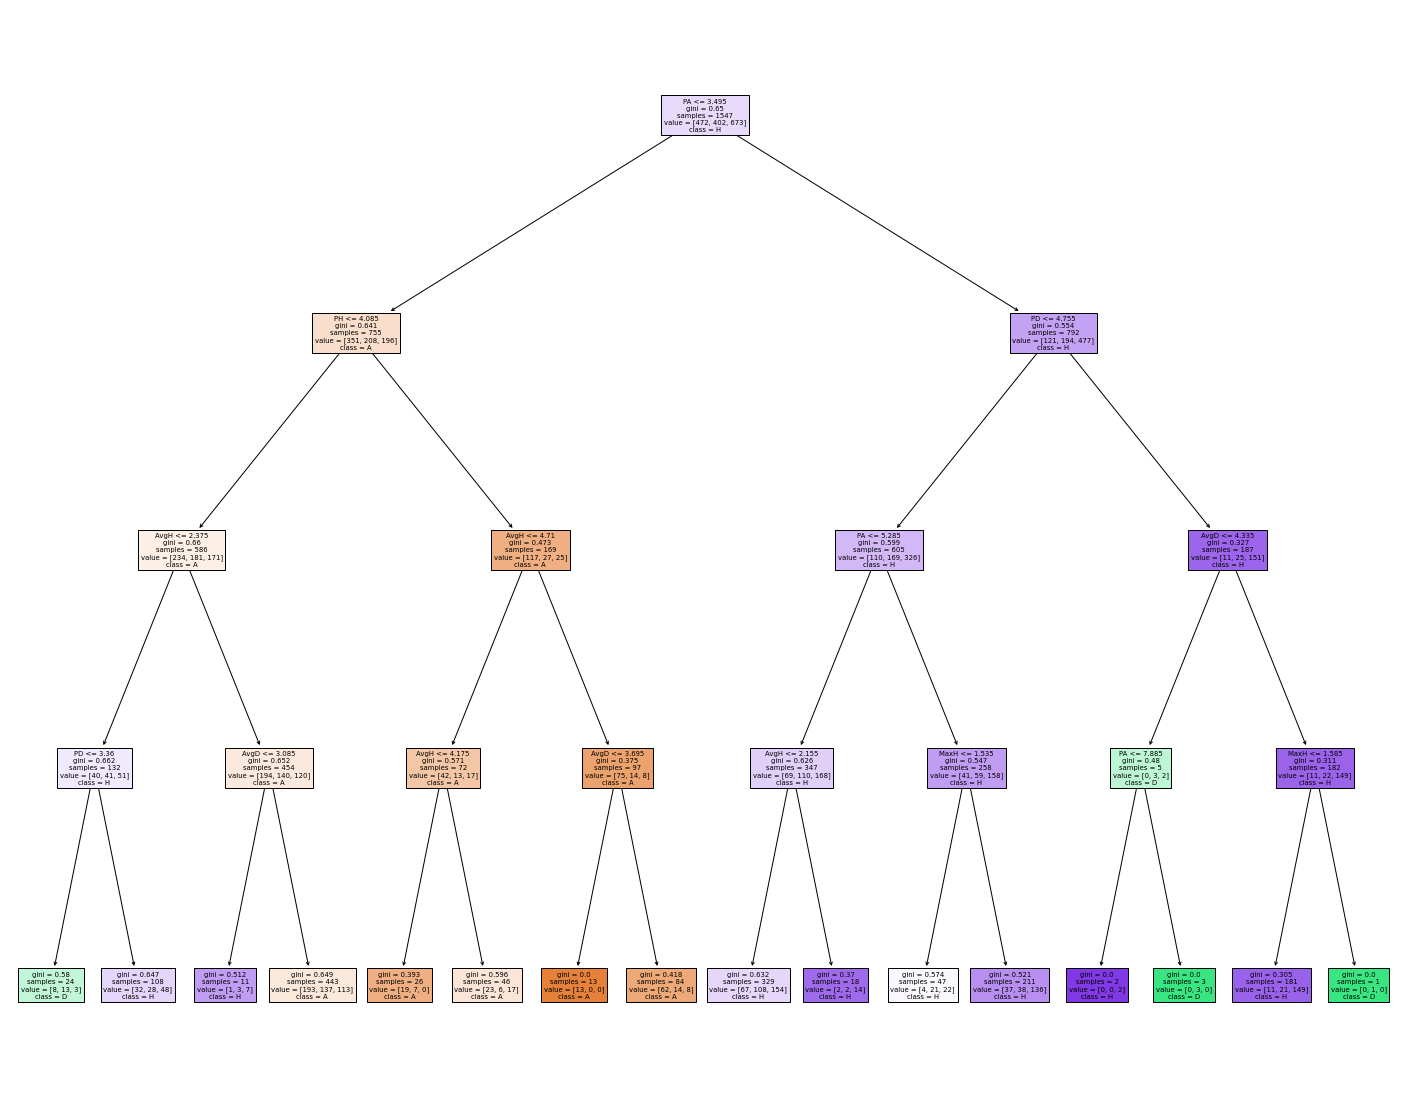

In [62]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names= features.columns,  
                   class_names=dt.classes_,
                   filled=True)

In [63]:
f = dt.predict_proba(X_test) 
prob_dt =  pd.DataFrame(f, columns=dt.classes_)

RPS for decisition tree

In [64]:
a = np.empty([387, 3]) 
j = 0
for i in y_test:
  if i == 'H':
    a[j] = [1,0,0]
  if i == 'D':
    a[j] = [0,1,0]
  if i == 'A':
    a[j] = [0,0,1]
  j = j +1
a
y_df_Test =  pd.DataFrame(a, columns=['H', 'D','A'])
y_df_Test
prob_dt = prob_dt[['H','D','A']]
prob_dt.head(3)
rps_2 = ((prob_dt['H']-y_df_Test['H'])**2+((prob_dt['H']-y_df_Test['H'])+ prob_dt['D']-y_df_Test['D'])**2)/2
print('Avarage value of RPS:',rps_2.mean(axis=0))

Avarage value of RPS: 0.21024943139880667


In [194]:
del X, X_test, X_train,y, y_test, y_train, pred

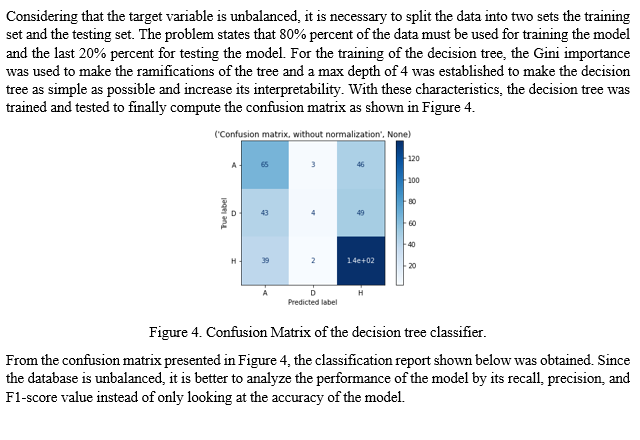

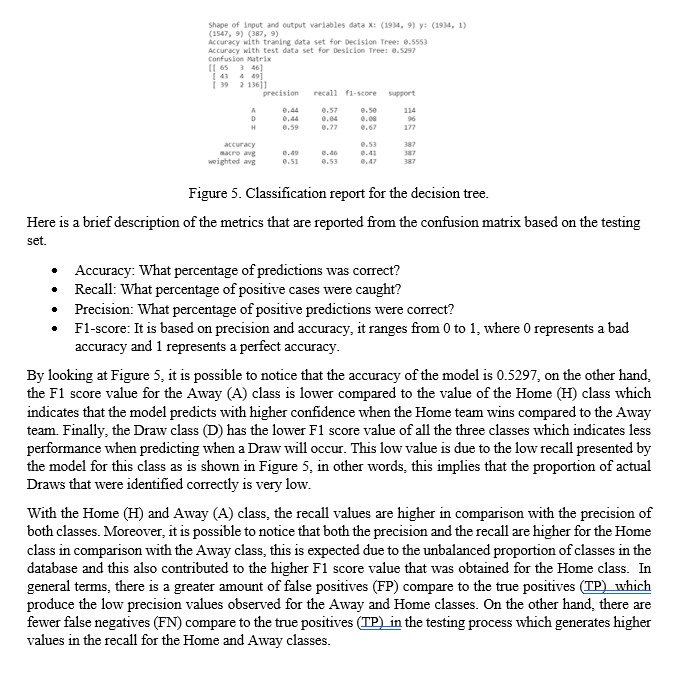

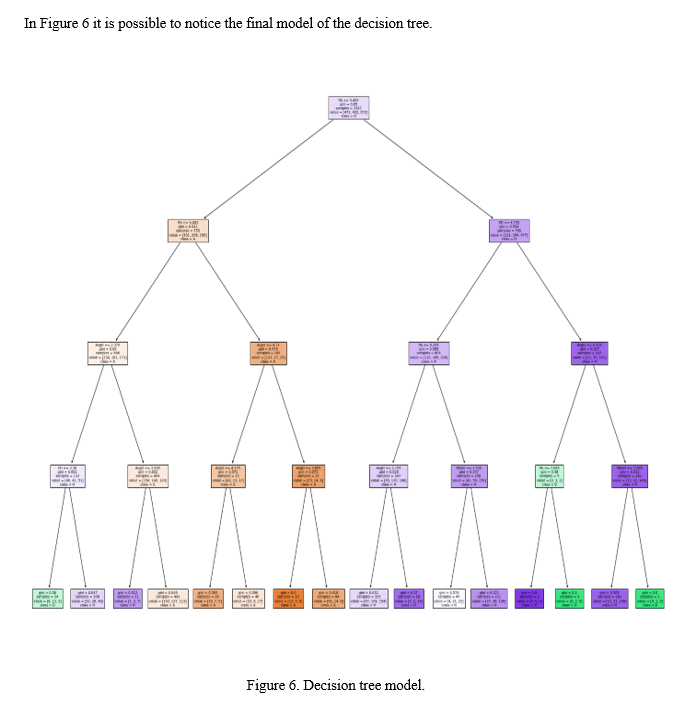

Training of the Support Vector Machine Classifier 

In [65]:
#Import svm model
from sklearn import svm

X = features.values
y = df_sweden_remove.loc[:,['Res']].values
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1) # 80% training and 20% test

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

#Create a svm Classifier
svc = svm.SVC(probability=True) 
#Train the model using the training sets
svc.fit(X_train, y_train.ravel())

# Model Accuracy: how often is the classifier correct?
print('Accuracy of SVM classifier on training set: {:.4f}'
     .format(svc.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.4f}'
     .format(svc.score(X_test, y_test)))

pred = svc.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Accuracy of SVM classifier on training set: 0.5294
Accuracy of SVM classifier on test set: 0.5271
Confusion Matrix
[[ 62   0  52]
 [ 41   0  55]
 [ 35   0 142]]
              precision    recall  f1-score   support

           A       0.45      0.54      0.49       114
           D       0.00      0.00      0.00        96
           H       0.57      0.80      0.67       177

    accuracy                           0.53       387
   macro avg       0.34      0.45      0.39       387
weighted avg       0.39      0.53      0.45       387



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Plot Confusion Matrix for SVC

('Confusion matrix, without normalization', None)
[[ 62   0  52]
 [ 41   0  55]
 [ 35   0 142]]


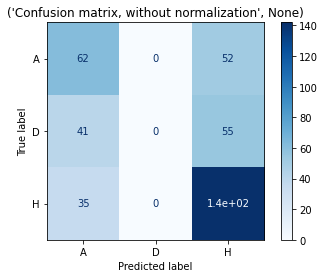

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None)]
for title in titles_options:
    disp = plot_confusion_matrix(svc, X_test, y_test,
                                 display_labels=svc.classes_,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [67]:
f = svc.predict_proba(X_test) 
prob_svc =  pd.DataFrame(f, columns=svc.classes_)

RPS Support Vector Classifier 

In [68]:
a = np.empty([387, 3]) 
j = 0
for i in y_test:
  if i == 'H':
    a[j] = [1,0,0]
  if i == 'D':
    a[j] = [0,1,0]
  if i == 'A':
    a[j] = [0,0,1]
  j = j +1
a
y_df_Test =  pd.DataFrame(a, columns=['H', 'D','A'])
y_df_Test
prob_svc = prob_svc[['H','D','A']]
prob_svc.head(3)
rps_2 = ((prob_svc['H']-y_df_Test['H'])**2+((prob_svc['H']-y_df_Test['H'])+ prob_svc['D']-y_df_Test['D'])**2)/2
print('Avarage value of RPS:',rps_2.mean(axis=0))

Avarage value of RPS: 0.20457963055877612


In [69]:
del X, X_test, X_train,y, y_test, y_train, pred

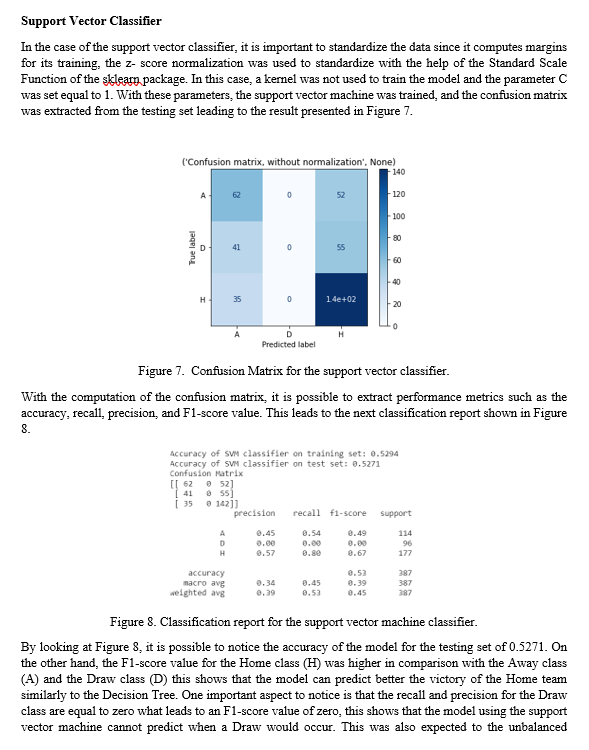

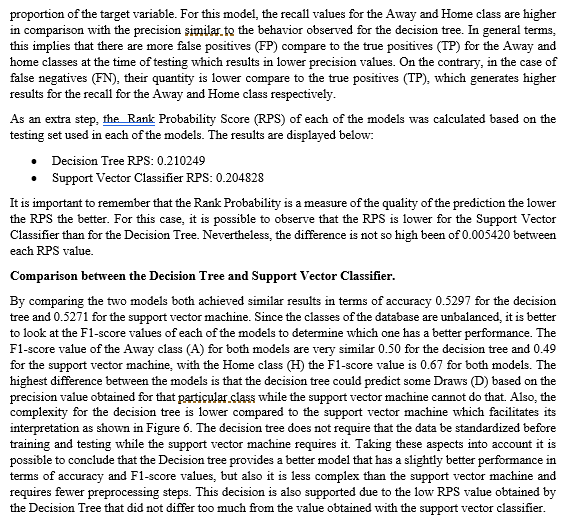



---



---



---



---





---



**Question 4**

For the following dataset, prepare the data and perform a clustering analysis. wine.csvPreview the document

1. Perform a dbscan clustering analysis

2. Perform a k-means and agglomerative cluster analysis. Find the best k using elbow method. (10 pts)

3. Select the best model using silhouette coefficient. (10 pts)

4. Give your conclusions of the results obtained (10 pts)

Upload csv file for wine data

In [70]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine (2).csv


Import wine data

In [71]:
#Import csv into a dataframe 
import io
import numpy as np #Library to manage arrays 
import pandas as pd #Lirary for mange dataframes 
import matplotlib.pyplot as plt # Library to make plots. 
df_wine = pd.read_csv(io.BytesIO(uploaded['wine.csv'])) 

Some columns were empty in the database when was imported and they did not have a name, so they were remove 

In [72]:
df_wine = df_wine.dropna(axis=1)

Print shape of the data 

In [73]:
print("Complete Data shape:", df_wine.shape)

Complete Data shape: (178, 13)


Visualize data in a dataframe 

In [74]:
df_wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Import silhouette score functions 

In [75]:
from sklearn.cluster import *
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

**Perform a dbscan clustering analysis**

DBscan

Standardize data

In [76]:
x1 = df_wine.values
x1 = StandardScaler().fit_transform(x1)

Test different eps values between 2.3 and 2.5 

In [77]:
testx = np.linspace(2.3, 2.5, num=1000)

0.21701633523077773

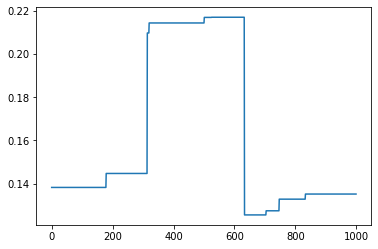

In [78]:
sil = np.empty(len(testx))
for i in range(len(testx)):
  dbcluster = DBSCAN(eps=testx[i], min_samples=3).fit(x1)
  dbcluster.labels_
  silhouette_score(x1, dbcluster.labels_)
  sil[i] = silhouette_score(x1, dbcluster.labels_)
plt.plot(sil)
max(sil)

Final eps value 

In [79]:
result = np.where(sil == np.amax(sil))
print(result[0][0])

525


In [80]:
eps_x = testx[result[0][0]]
print(eps_x)

2.405105105105105


Compute DBSCAN and silhouette score. 

In [81]:
dbcluster = DBSCAN(eps=eps_x, min_samples=3).fit(x1)
dbcluster.labels_
print("Number of clusters:",len(set(dbcluster.labels_)))
silhouette_score(x1, dbcluster.labels_)

Number of clusters: 3


0.21701633523077773

Graph clustering results

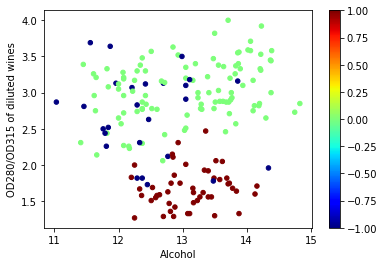

In [82]:
df_wine.plot.scatter(x = 'Alcohol', y = 'OD280/OD315 of diluted wines', c = dbcluster.labels_, colormap='jet', sharex=False)

As can be seen, clusters marked with brown dots are better separated than those with green or blue dots. The blue points and the green point are not well separated, which causes a greater penalty to the silhouette's score, which consequently results in a lower value. It is difficult to conclude whether the parameters selected for the epsilon and min samples are optimal. In the next section, we will test other methods for cluster analysis to determine if the clustering can be improved.

Elbow Method 

To perform the clustering analysis, it is important to standardize the data since K-Means, and Agglomerative clustering is based on the computation of distances and the variables of the database have different ranges.  For this purpose, z-score normalization was performed in the variables. To select the best value of K for the K-Means algorithm and the Agglomerative clustering the elbow method was used for this purpose. The elbow method is one of the most common techniques to determine the optimal value for the clusters, the idea is to execute the K-means method for a range of different values of K, and for each value of K, the sum of the square distance from each point to its assigned center is computed, these distances are also known as distortions.  By plotting the distortions it is possible to observe an arm in the curvature, therefore the elbow of that arm will be the optimal value for K. The results of applying the elbow method are shown in Figure 2. The elbow can be appreciated for K = 3 that is indicated with a red dot in Figure 2. 

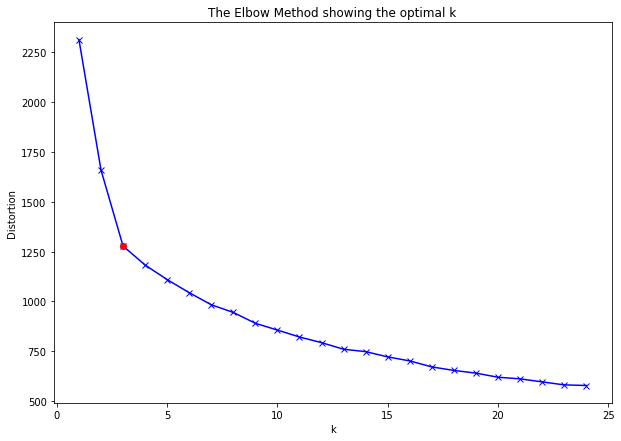

In [83]:
from sklearn.preprocessing import StandardScaler
distortions = []
K = range(1,25)
X = df_wine.values
X = StandardScaler().fit_transform(X)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(10,7))
plt.plot(K, distortions, 'bx-')
plt.plot(3,distortions[2],'ro')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

K-Means Clustering and Silhouette scores

K = 2

In [84]:
km2 = KMeans(n_clusters=2).fit(X)
silhouette_score(X, km2.labels_)

0.26831340971052126

K = 4

In [95]:
km4 = KMeans(n_clusters=4).fit(X)
silhouette_score(X, km4.labels_)

0.2463545989758315

K = 3

In [96]:
km3 = KMeans(n_clusters=3).fit(X) # K = 3
print("Silhouette score K = 3:",silhouette_score(X, km3.labels_))
print("Silhouette score K = 2:",silhouette_score(X, km2.labels_))
print("Silhouette score K = 4:",silhouette_score(X, km4.labels_))

Silhouette score K = 3: 0.2848589191898987
Silhouette score K = 2: 0.26831340971052126
Silhouette score K = 4: 0.2463545989758315


Visualize clusters generated by k-means algorithm 

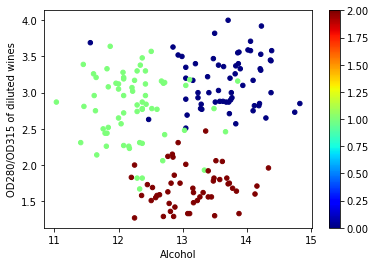

In [97]:
df_wine.plot.scatter(x = 'Alcohol', y = 'OD280/OD315 of diluted wines', c = km3.labels_, colormap='jet', sharex=False )

With this value, the K-means and agglomerative clustering are computed, and later the silhouette score is used as a metric to determine the performance of using that specific value of K = 3. Below are listed the silhouette score for different values for K and are compared to the proposed optimal value according to the elbow method. It is possible to notice that the highest score is obtained with the value of K =3. 
•	Silhouette score K = 3: 0.2848589191898987
•	Silhouette score K = 2: 0.2614352045273167
•	Silhouette score K = 4: 0.24519129323772165

The clustering in three groups can be appreciated in the Figure below. Comparing Figure 3 with Figure 1, it is possible to observe that the K-means method provides a better separation in three clusters of the data compared to the DBSCAN. This is also reflected in the higher silhouette score. 


Agglomerative Clustering and Silhouette Scores 

K=2

In [98]:
ac2 = AgglomerativeClustering(n_clusters=2).fit(X)
silhouette_score(X, ac2.labels_)

0.2670131771272231

K = 4

In [99]:
ac4 = AgglomerativeClustering(n_clusters=4).fit(X)
silhouette_score(X, ac4.labels_)

0.225836659334758

K = 3

In [100]:
ac3 = AgglomerativeClustering(n_clusters=3).fit(X)
silhouette_score(X, ac3.labels_)

0.2774439826952265

Visualize clusters obtained from Agglomerative Clustering 

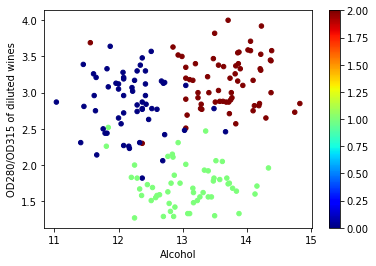

In [101]:
df_wine.plot.scatter(x = 'Alcohol', y = 'OD280/OD315 of diluted wines', c = ac3.labels_, colormap='jet', sharex=False)

Silhouette score comparison 

In [103]:
print("Silhouette score K = 3:",silhouette_score(X, ac3.labels_))
print("Silhouette score K = 2:",silhouette_score(X, ac2.labels_))
print("Silhouette score K = 4:",silhouette_score(X, ac4.labels_))

Silhouette score K = 3: 0.2774439826952265
Silhouette score K = 2: 0.2670131771272231
Silhouette score K = 4: 0.225836659334758


Insights 

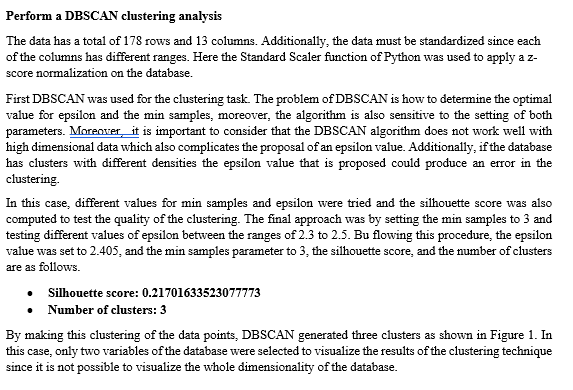

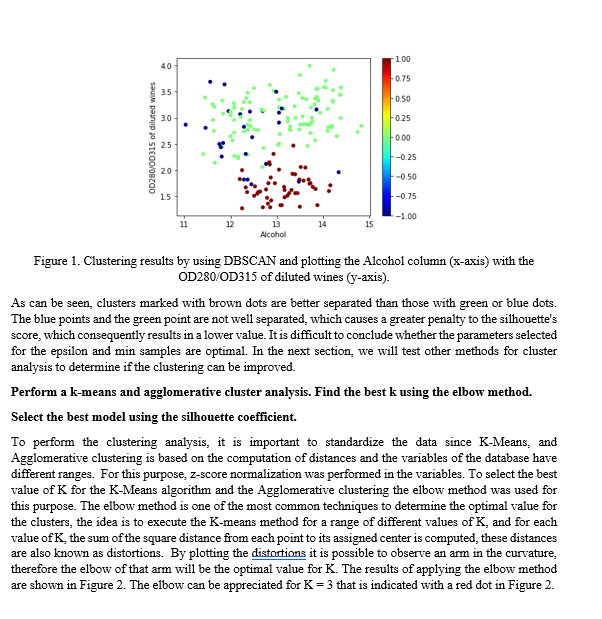

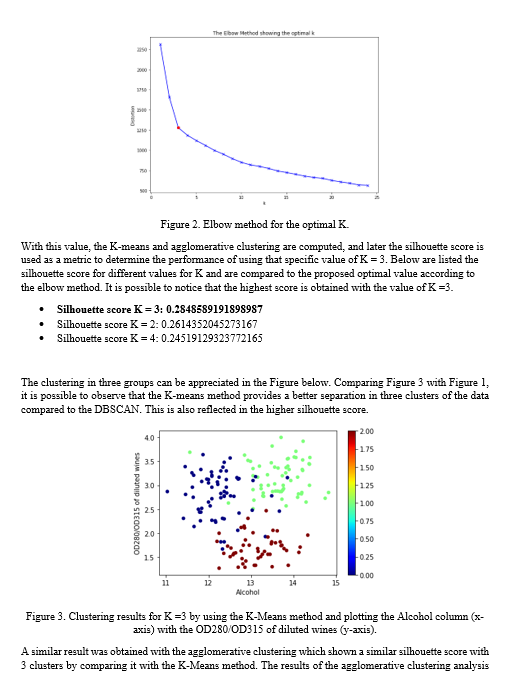

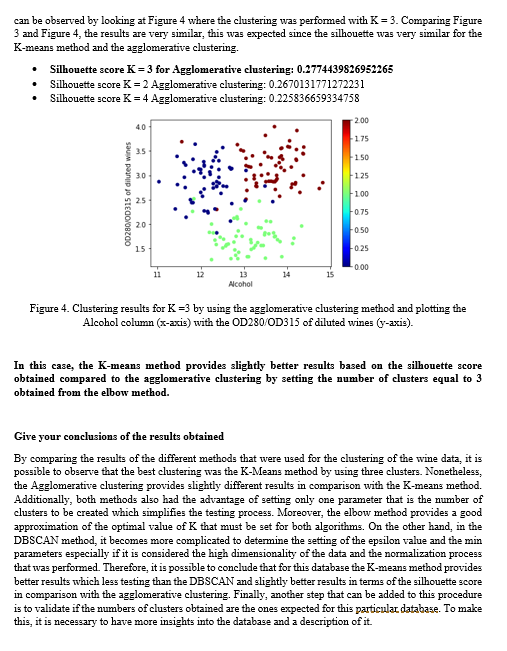